In [ ]:
!conda install --yes cvxopt

In [3]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import cvxopt

In [4]:
data=pd.read_csv('/Users/yangxiaomin/Documents/courses/csci 5525/5525HW_2/hw2data.csv')
data.head()

,1.764052345967664,0.4001572083672233,-1.0
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0


In [5]:
# split data into train test
n_t=data.shape[0]
n_train=round(0.8*n_t)
n_test=n_t-n_train
x_train=data.iloc[:n_train,:2]
x_test=data.iloc[n_train:,:2]
y_train=data.iloc[:n_train,[2]]
y_test=data.iloc[n_train:,[2]]

In [6]:
def svmfit(x_train,y_train,c):
    y_train=pd.DataFrame.as_matrix(y_train)
    n_train=x_train.shape[0]
    #compute H matrix
    H=np.dot(y_train*x_train,(y_train*x_train).T)*1.
    # construct cvsmatrix
    q=-np.ones((n_train,1))
    G=np.vstack((-np.eye(n_train),np.eye(n_train)))
    p=H
    h=np.hstack((np.zeros(n_train),np.ones(n_train)*c))
    b=np.zeros(1)
    q=cvxopt.matrix(q)
    G=cvxopt.matrix(G)
    p=cvxopt.matrix(p)
    h=cvxopt.matrix(h)
    A=cvxopt.matrix(y_train.T)
    b=cvxopt.matrix(b)
    
    # solve problem
    sol = cvxopt.solvers.qp(p, q, G, h, A, b)
    # langurange multipliers
    a=np.ravel(sol['x'])
    # pick support point
    ind=a>0
    a=a[ind]
    x_train=x_train[ind]
    y_train=y_train[ind]
    # compute w
    n_t=a.shape[0]
    a=a.reshape((n_t,1))
    w=np.multiply(y_train,a)*x_train
    w=np.sum(w,axis=0)
    
    return w
    

In [7]:
# predict 
def predict(x_test,w):
    n_test=x_test.shape[0]
    z=np.dot(x_test,w.T)
    pred=np.sign(z)
    pred=pred.reshape(n_test,1)
    return pred

In [8]:
#caculate accuracy by unmatched
def accuracy(y_test,y_pred):
    n_test=y_test.shape[0]
    correct=np.sum(y_test==y_pred)
    return correct/n_test





In [9]:
# shuffled the dataset
def cross_validation(x_train,y_train):
    
    n=x_train.shape[0]
    index = np.random.permutation(n)
    x_shuffled=x_train.iloc[index,:]
    y_shuffled=y_train.iloc[index,:]
    return x_shuffled,y_shuffled
    

In [10]:
def get_next_train_valid(X_shuffled, Y_shuffled, itr):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    size=len(Y_shuffled)/10
 
    validL=round(size*(itr-1))
    validR=round(size*(itr))
    X_valid=X_shuffled.iloc[validL:validR]
    y_valid=Y_shuffled.iloc[validL:validR]
    X_train=pd.concat([X_shuffled.iloc[0:validL],X_shuffled.iloc[validR:]])  
    y_train=pd.concat([Y_shuffled.iloc[0:validL],Y_shuffled.iloc[validR:]]) 
    return X_train,y_train,X_valid, y_valid
    #return training and validation data

In [11]:
def main(x_train,y_train,x_test,y_test,c):
    x_shuffled,y_shuffled=cross_validation(x_train,y_train)
    accu_cv=list()
    accu_t=list()
    accu_tra=list()
    for itr in range(1,11):
        x_train, y_train, x_valid, y_valid=get_next_train_valid(x_shuffled, y_shuffled, itr)
        #ntrain data using train set
        w=svmfit(x_train,y_train,c)
        #predict in v set
        pred=predict(x_valid,w)
        # predict in test set
        tpred=predict(x_test,w)
        print('predict in train set')
        trapred=predict(x_train,w)
        print('caculate accuray')
        a=accuracy(pred,y_valid)
        at=accuracy(tpred,y_test)
        atra=accuracy(trapred,y_train)
        accu_cv.append(a)
        accu_t.append(at)
        accu_tra.append(atra)
    cv_a=np.mean(accu_cv)
    cv_t=np.mean(accu_t)
    cv_tra=np.mean(accu_tra)
    
    
    return cv_a,cv_t,cv_tra,accu_t
        

In [2]:
validation_maccu,test_maccu,train_maccu,test_accu=main(x_train,y_train,x_test,y_test,2)
print('validation mean accuracy: ' + str(validation_maccu))
print('test mean accuracy: ' + str(test_maccu))
print('train mean accuracy:' + str(train_maccu))
print('test accuracy: '+ str(test_accu))

NameError: name 'main' is not defined

In [29]:
print('validation mean accuracy: ' + str(validation_maccu))
print('test mean accuracy: ' + str(test_maccu))
print('train mean accuracy:' + str(train_maccu))
print('test accuracy: '+ str(test_accu))

validation mean accuracy: 0.5134748427672955
test mean accuracy: 0.48575
train mean accuracy:0.5161563778858776
test accuracy: [-1.0    0.485
dtype: float64, -1.0    0.49
dtype: float64, -1.0    0.48
dtype: float64, -1.0    0.49
dtype: float64, -1.0    0.495
dtype: float64, -1.0    0.4975
dtype: float64, -1.0    0.4825
dtype: float64, -1.0    0.4775
dtype: float64, -1.0    0.4775
dtype: float64, -1.0    0.4825
dtype: float64]


In [12]:
hper=np.array([0.0001,0.001,0.01,0.1,10,100,1000])
mean_train=list()
mean_test=list()
mean_valid=list()
for c in hper:
    
    validation_maccu,test_maccu,train_maccu,test_accu=main(x_train,y_train,x_test,y_test,c)
    mean_train.append(train_maccu)
    mean_test.append(test_maccu)
    mean_valid.append(validation_maccu)
 

   

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


     pcost       dcost       gap    pres   dres
 0: -7.1843e+02 -2.9737e-01  6e+03  8e+01  2e-14
 1: -7.3310e+00 -2.9735e-01  6e+01  8e-01  2e-14
 2: -2.0585e-01 -2.9592e-01  1e+00  1e-02  2e-15
 3: -1.1878e-01 -2.3194e-01  1e-01  2e-18  2e-15
 4: -1.3843e-01 -1.4579e-01  7e-03  2e-18  2e-15
 5: -1.4155e-01 -1.4253e-01  1e-03  2e-18  2e-15
 6: -1.4158e-01 -1.4165e-01  7e-05  6e-18  1e-15
 7: -1.4159e-01 -1.4163e-01  5e-05  3e-18  2e-15
 8: -1.4159e-01 -1.4163e-01  4e-05  2e-18  2e-15
 9: -1.4159e-01 -1.4163e-01  4e-05  2e-18  2e-15
10: -1.4159e-01 -1.4163e-01  4e-05  5e-18  1e-15
11: -1.4159e-01 -1.4162e-01  3e-05  3e-18  9e-16
12: -1.4160e-01 -1.4161e-01  1e-05  1e-18  1e-15
13: -1.4160e-01 -1.4161e-01  8e-06  4e-18  1e-15
14: -1.4160e-01 -1.4160e-01  3e-06  3e-18  1e-15
15: -1.4160e-01 -1.4160e-01  2e-06  3e-18  1e-15
16: -1.4160e-01 -1.4160e-01  9e-07  3e-18  1e-15
17: -1.4160e-01 -1.4160e-01  4e-07  8e-19  1e-15
18: -1.4160e-01 -1.4160e-01  1e-07  9e-18  1e-15
Optimal solution foun

     pcost       dcost       gap    pres   dres
 0: -7.1822e+02 -2.9992e-01  6e+03  8e+01  2e-14
 1: -7.3297e+00 -2.9991e-01  7e+01  9e-01  2e-14
 2: -2.0663e-01 -2.9844e-01  1e+00  1e-02  2e-15
 3: -1.1832e-01 -2.3440e-01  1e-01  3e-18  2e-15
 4: -1.3799e-01 -1.4612e-01  8e-03  9e-19  2e-15
 5: -1.4115e-01 -1.4213e-01  1e-03  2e-18  2e-15
 6: -1.4118e-01 -1.4126e-01  8e-05  1e-18  1e-15
 7: -1.4118e-01 -1.4124e-01  6e-05  3e-18  5e-15
 8: -1.4119e-01 -1.4123e-01  4e-05  9e-19  2e-15
 9: -1.4119e-01 -1.4122e-01  2e-05  2e-18  1e-15
10: -1.4120e-01 -1.4121e-01  1e-05  2e-18  1e-15
11: -1.4120e-01 -1.4120e-01  2e-06  1e-18  1e-15
12: -1.4120e-01 -1.4120e-01  1e-07  2e-18  1e-15
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.1764e+02 -3.0114e-01  7e+03  9e+01  2e-14
 1: -7.3296e+00 -3.0112e-01  7e+01  9e-01  2e-14
 2: -2.1059e-01 -2.9956e-01  1e+00  1e-02  2e-15
 3: -1.1793e-01 -2.3704e-01  1e-01  2e-18  2e-15
 4: -1.37

10: -1.4165e+00 -1.4199e+00  3e-03  3e-17  9e-16
11: -1.4168e+00 -1.4196e+00  3e-03  7e-17  7e-16
12: -1.4171e+00 -1.4193e+00  2e-03  5e-17  7e-16
13: -1.4174e+00 -1.4188e+00  1e-03  2e-16  8e-16
14: -1.4176e+00 -1.4185e+00  9e-04  3e-17  9e-16
15: -1.4177e+00 -1.4183e+00  6e-04  2e-17  9e-16
16: -1.4178e+00 -1.4182e+00  4e-04  9e-18  9e-16
17: -1.4179e+00 -1.4181e+00  2e-04  3e-17  1e-15
18: -1.4179e+00 -1.4180e+00  6e-05  7e-17  2e-15
19: -1.4179e+00 -1.4180e+00  2e-05  1e-16  1e-15
20: -1.4179e+00 -1.4180e+00  4e-06  9e-18  1e-15
21: -1.4180e+00 -1.4180e+00  8e-07  1e-17  1e-15
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.1850e+02 -2.9752e+00  6e+03  8e+01  2e-14
 1: -8.1815e+00 -2.9741e+00  6e+01  8e-01  2e-14
 2: -1.1426e+00 -2.8605e+00  2e+00  2e-16  2e-15
 3: -1.3379e+00 -1.4517e+00  1e-01  1e-16  2e-15
 4: -1.4047e+00 -1.4225e+00  2e-02  2e-16  1e-15
 5: -1.4061e+00 -1.4120e+00  6e-03  8e-17  1e-15
 6: -1.4

 8: -1.4020e+01 -1.4021e+01  7e-04  2e-16  2e-15
 9: -1.4020e+01 -1.4020e+01  8e-06  8e-17  1e-15
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.2487e+02 -3.0137e+01  7e+03  9e+01  2e-14
 1: -1.7760e+01 -3.0020e+01  8e+01  8e-01  2e-14
 2: -1.1877e+01 -2.1943e+01  1e+01  2e-16  1e-15
 3: -1.3684e+01 -1.4882e+01  1e+00  8e-17  2e-15
 4: -1.3884e+01 -1.4540e+01  7e-01  2e-16  1e-15
 5: -1.3914e+01 -1.4484e+01  6e-01  9e-17  1e-15
 6: -1.3938e+01 -1.4426e+01  5e-01  1e-16  8e-16
 7: -1.4062e+01 -1.4243e+01  2e-01  7e-17  1e-15
 8: -1.4088e+01 -1.4206e+01  1e-01  2e-16  1e-15
 9: -1.4110e+01 -1.4173e+01  6e-02  3e-16  1e-15
10: -1.4122e+01 -1.4157e+01  4e-02  1e-16  1e-15
11: -1.4130e+01 -1.4147e+01  2e-02  7e-17  1e-15
12: -1.4135e+01 -1.4140e+01  5e-03  7e-17  1e-15
13: -1.4137e+01 -1.4138e+01  4e-04  8e-17  1e-15
14: -1.4137e+01 -1.4137e+01  7e-05  8e-17  1e-15
15: -1.4137e+01 -1.4137e+01  2e-06  1e-16  2e-15
Optimal 

14: -1.4163e+02 -1.4164e+02  1e-02  2e-15  3e-15
15: -1.4163e+02 -1.4163e+02  8e-04  1e-15  4e-15
16: -1.4163e+02 -1.4163e+02  3e-05  2e-15  3e-15
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.8941e+02 -3.0402e+02  7e+03  2e+01  2e-14
 1: -1.1473e+02 -2.9234e+02  2e+02  7e-02  2e-14
 2: -1.3069e+02 -1.4558e+02  2e+01  5e-03  4e-15
 3: -1.3475e+02 -1.4409e+02  1e+01  3e-03  3e-15
 4: -1.3588e+02 -1.4386e+02  8e+00  2e-03  3e-15
 5: -1.3717e+02 -1.4336e+02  6e+00  2e-03  2e-15
 6: -1.3875e+02 -1.4258e+02  4e+00  8e-04  2e-15
 7: -1.3998e+02 -1.4194e+02  2e+00  3e-04  3e-15
 8: -1.4054e+02 -1.4154e+02  1e+00  1e-04  3e-15
 9: -1.4089e+02 -1.4129e+02  4e-01  5e-05  3e-15
10: -1.4100e+02 -1.4120e+02  2e-01  2e-05  3e-15
11: -1.4110e+02 -1.4113e+02  3e-02  2e-06  3e-15
12: -1.4111e+02 -1.4111e+02  8e-04  1e-08  3e-15
13: -1.4111e+02 -1.4111e+02  1e-05  2e-10  3e-15
Optimal solution found.
predict in train set
caculate acc

10: -1.4138e+04 -1.4147e+04  8e+00  9e-14  3e-13
11: -1.4140e+04 -1.4140e+04  1e-01  5e-13  3e-13
12: -1.4140e+04 -1.4140e+04  1e-03  8e-13  3e-13
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.8926e+03 -4.3538e+04  4e+04  7e-13  2e-13
 1: -1.0177e+04 -1.4625e+04  4e+03  1e-13  2e-13
 2: -1.2971e+04 -1.4339e+04  1e+03  1e-13  3e-13
 3: -1.3010e+04 -1.4351e+04  1e+03  6e-13  3e-13
 4: -1.3195e+04 -1.4466e+04  1e+03  7e-13  3e-13
 5: -1.3470e+04 -1.4401e+04  9e+02  6e-14  3e-13
 6: -1.3698e+04 -1.4305e+04  6e+02  5e-13  3e-13
 7: -1.3860e+04 -1.4225e+04  4e+02  1e-13  3e-13
 8: -1.3996e+04 -1.4150e+04  2e+02  7e-13  3e-13
 9: -1.4043e+04 -1.4119e+04  8e+01  3e-13  3e-13
10: -1.4064e+04 -1.4103e+04  4e+01  3e-13  3e-13
11: -1.4078e+04 -1.4086e+04  8e+00  1e-13  4e-13
12: -1.4080e+04 -1.4080e+04  1e-01  3e-13  4e-13
13: -1.4080e+04 -1.4080e+04  1e-03  4e-13  3e-13
Optimal solution found.
predict in train set
caculate acc

14: -1.4009e+05 -1.4009e+05  6e-02  2e-16  3e-12
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.2532e+04 -1.4564e+06  1e+06  2e-12  2e-12
 1: -7.9429e+04 -1.5659e+05  8e+04  5e-13  2e-12
 2: -1.3513e+05 -1.5172e+05  2e+04  5e-12  3e-12
 3: -1.3644e+05 -1.4929e+05  1e+04  5e-13  3e-12
 4: -1.3833e+05 -1.4597e+05  8e+03  2e-12  3e-12
 5: -1.3970e+05 -1.4377e+05  4e+03  9e-13  3e-12
 6: -1.4032e+05 -1.4283e+05  3e+03  5e-13  3e-12
 7: -1.4087e+05 -1.4207e+05  1e+03  3e-12  3e-12
 8: -1.4124e+05 -1.4157e+05  3e+02  3e-12  3e-12
 9: -1.4138e+05 -1.4141e+05  3e+01  5e-12  3e-12
10: -1.4139e+05 -1.4140e+05  5e+00  9e-13  3e-12
11: -1.4139e+05 -1.4139e+05  2e+00  5e-13  3e-12
12: -1.4139e+05 -1.4139e+05  2e-02  3e-12  3e-12
Optimal solution found.
predict in train set
caculate accuray
     pcost       dcost       gap    pres   dres
 0: -7.1707e+05 -1.2366e+08  1e+08  2e-12  2e-11
 1: -7.2616e+05 -2.6513e+06  2e+06  2e-12  1e

In [19]:
print(np.round(mean_train,3))
print(np.round(mean_test,3))
print(np.round(mean_valid,3))
print(mean_train)

[0.516 0.515 0.517 0.516 0.514 0.517 0.515]
[0.494 0.49  0.492 0.492 0.488 0.492 0.492]
[0.498 0.507 0.512 0.497 0.512 0.497 0.515]
[0.5160863543355726, 0.5151834800401514, 0.5166428268087406, 0.5161556540035519, 0.5136542062389005, 0.5169207011041619, 0.5153225137055054]


In [27]:
def plot(mean,title):
    hper=list((0.0001,0.001,0.01,0.1,10,100,1000))
    fig,ax=plt.subplots()

    ax.scatter(hper,mean, color='lightblue')
    lines = ax.plot(hper,mean) 
    ax.set(title=title,xlabel='C', ylabel='mean accuracy',ylim=[0.48,0.52])
    plt.show()
    plt.savefig(str(title)+'.jpg')
   

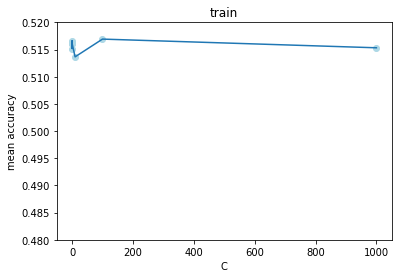

<Figure size 432x288 with 0 Axes>

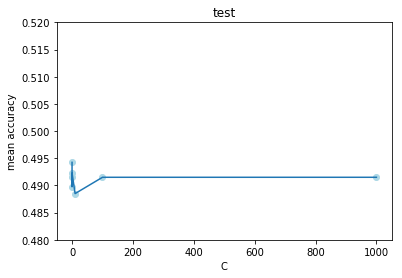

<Figure size 432x288 with 0 Axes>

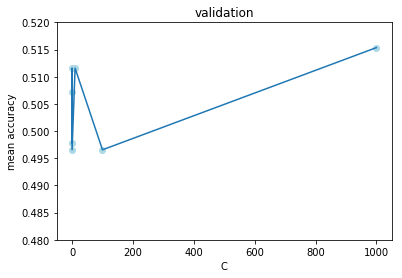

<Figure size 432x288 with 0 Axes>

In [28]:
plot(mean_train,'train')
plot(mean_test,'test')
plot(mean_valid,'validation')


In [86]:

"""
train set has the highest accuracy,test set has the lowest accuracy which make sense. Cause model trained in train set.
The choice of C result slightly different accuracy but it doesn't vary much.
"""


AttributeError: 'list' object has no attribute 'max'

In [95]:
print(mean_test)
print(mean_valid)
print(mean_train)

[0.48624999999999996, 0.49049999999999994, 0.49074999999999996, 0.49549999999999994, 0.48825, 0.4885, 0.48975]
[0.5091391509433963, 0.49533805031446543, 0.5009473270440252, 0.4952712264150943, 0.5065369496855345, 0.5103223270440251, 0.5022209119496855]
[0.5138636495251332, 0.5172672959617018, 0.5162951219983013, 0.5165024901552003, 0.5165035035904564, 0.5149745676009575, 0.5145577561578256]


In [ ]:
'''
Used soft margin SVM to maximize margin when find hyper plane.
  Mainly solved in dual space by converting the minimization to a maximization problem be constructing the Langrangian
  and then using the KKT conditions. 
  And then solve dual optimization problem to find support vector so that get w。
'''


